<a href="https://colab.research.google.com/github/HigorAnt/Machine-Learning-Project/blob/main/trabalhofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAÇÃO DAS BIBLIOTECAS

In [20]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

In [21]:
data, meta = arff.loadarff('php0FyS2T.arff')
df = pd.DataFrame(data)

In [22]:
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0  0.000579  0.000609  0.000551  0.000554  0.000603  0.000614  0.000611   
1  0.000630  0.000661  0.000719  0.000651  0.000643  0.000640  0.000646   
2  0.000616  0.000615  0.000606  0.000568  0.000558  0.000552  0.000551   
3  0.000613  0.000569  0.000564  0.000607  0.000643  0.000647  0.000663   
4  0.000599  0.000552  0.000558  0.000569  0.000616  0.000639  0.000631   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.000611  0.000611  0.000594  0.000567  0.000545  0.000549  0.000522   
1  0.000624  0.000584  0.000546  0.000520  0.000492  0.000474  0.000458   
2  0.000552  0.000531  0.000530  0.000507  0.000501  0.000488  0.000426   
3  0.000658  0.000635  0.000600  0.000586  0.000569  0.000547  0.000518   
4  0.000634  0.000639  0.000596  0.000587  0.000576  0.000567  0.000539   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.000520  0.000500  

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1600 non-null   float64
 1   V2      1600 non-null   float64
 2   V3      1600 non-null   float64
 3   V4      1600 non-null   float64
 4   V5      1600 non-null   float64
 5   V6      1600 non-null   float64
 6   V7      1600 non-null   float64
 7   V8      1600 non-null   float64
 8   V9      1600 non-null   float64
 9   V10     1600 non-null   float64
 10  V11     1600 non-null   float64
 11  V12     1600 non-null   float64
 12  V13     1600 non-null   float64
 13  V14     1600 non-null   float64
 14  V15     1600 non-null   float64
 15  V16     1600 non-null   float64
 16  V17     1600 non-null   float64
 17  V18     1600 non-null   float64
 18  V19     1600 non-null   float64
 19  V20     1600 non-null   float64
 20  V21     1600 non-null   float64
 21  V22     1600 non-null   float64
 22  

In [24]:
print(df.dtypes)

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V61      float64
V62      float64
V63      float64
V64      float64
Class     object
Length: 65, dtype: object


In [25]:
pd.set_option('display.max_columns', None)
print(df.isnull().sum())

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V61      0
V62      0
V63      0
V64      0
Class    0
Length: 65, dtype: int64


In [26]:
print(df.describe())

                V1           V2           V3           V4           V5  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean      0.000737     0.000715     0.000690     0.000667     0.000646   
std       0.000270     0.000265     0.000258     0.000252     0.000250   
min       0.000168     0.000182     0.000148     0.000104     0.000120   
25%       0.000520     0.000507     0.000497     0.000483     0.000478   
50%       0.000710     0.000690     0.000671     0.000651     0.000636   
75%       0.000927     0.000898     0.000864     0.000833     0.000790   
max       0.002390     0.002247     0.002112     0.001998     0.002151   

                V6           V7           V8           V9          V10  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean      0.000627     0.000612     0.000600     0.000587     0.000575   
std       0.000249     0.000253     0.000263     0.000275     0.000292   
min       0.000118     0.000085     0

In [27]:
X = df.drop(['Class'], axis=1)
X = X.values
y = df['Class']
y = y.apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
y = y.values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

feature_importances = pd.Series(clf.feature_importances_, index=df.drop(['Class'], axis=1).columns)

top_features = feature_importances.nlargest(5)

print("Top 5 Features mais importantes pelo MDI:")
print(top_features)

Top 5 Features mais importantes pelo MDI:
V17    0.022815
V48    0.020954
V18    0.020508
V33    0.020218
V16    0.019652
dtype: float64


In [28]:
feature_importances_percent = (feature_importances / feature_importances.sum()) * 100

top_features_percent = feature_importances_percent.nlargest(5)

print("Top 5 Features mais importantes em porcentagem:")
print(top_features_percent)

Top 5 Features mais importantes em porcentagem:
V17    2.281462
V48    2.095427
V18    2.050755
V33    2.021813
V16    1.965206
dtype: float64


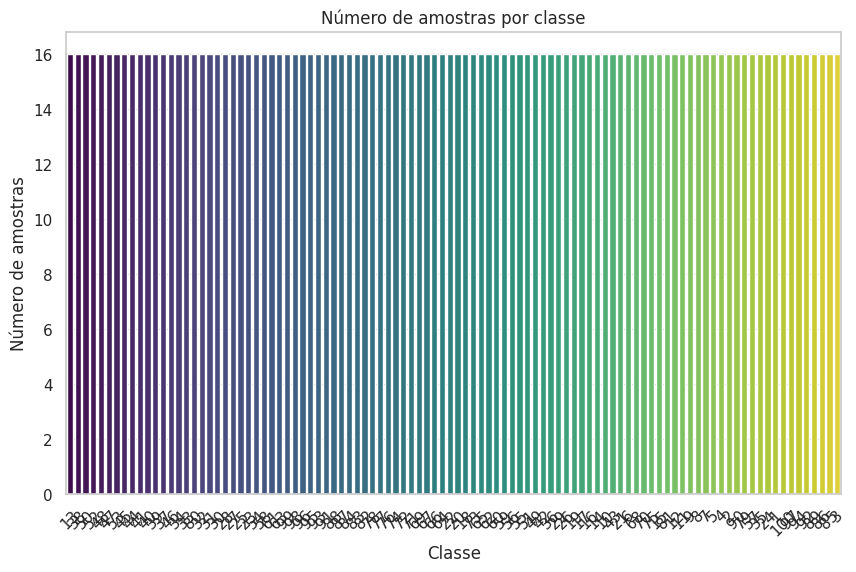

In [29]:
contagem_por_classe = df['Class'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_por_classe.index, y=contagem_por_classe.values, hue=contagem_por_classe.index, palette="viridis", legend=False)

plt.xlabel("Classe")
plt.ylabel("Número de amostras")
plt.title("Número de amostras por classe")

plt.xticks(rotation=45)

plt.show()

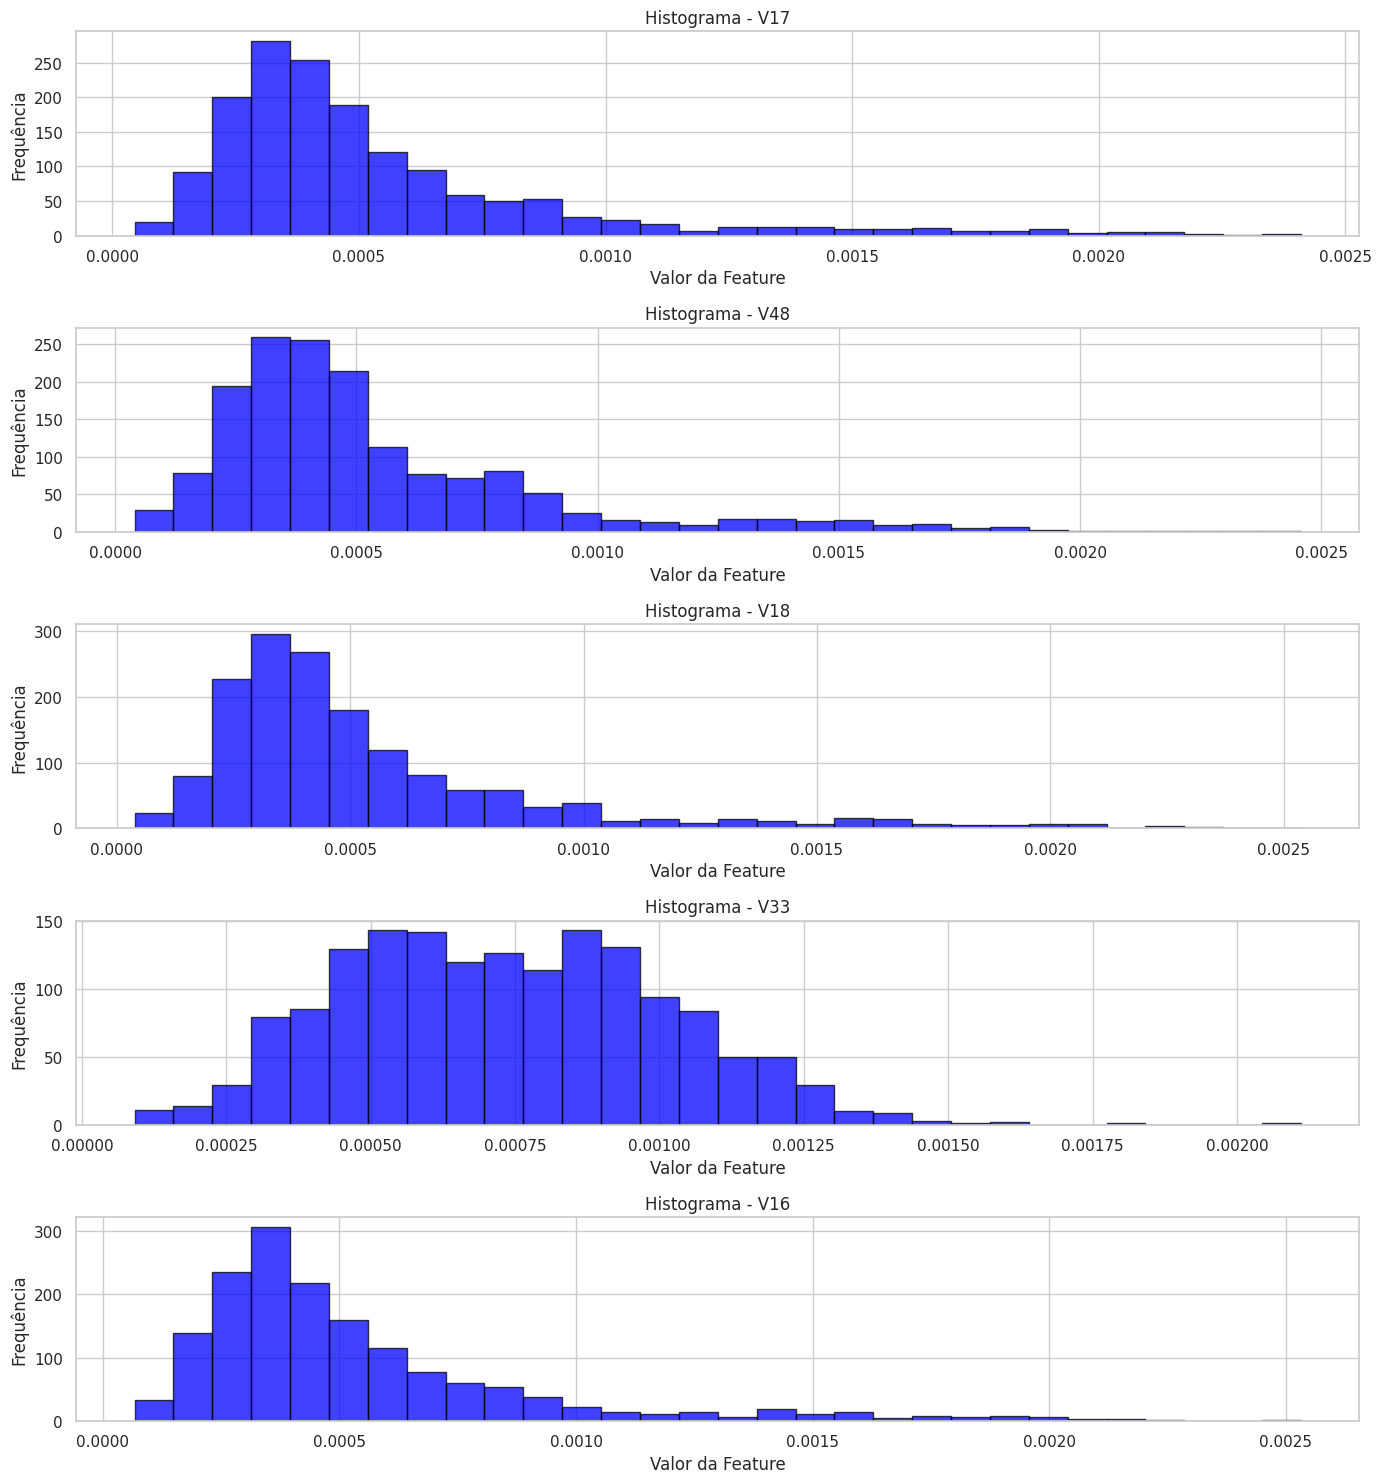

In [30]:
n_features = len(top_features)
nrows = n_features
ncols = 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 3 * nrows))

if n_features == 1:
    axes = [axes]

for i, feature in enumerate(top_features.index):
    feature_index = df.columns.get_loc(feature)

    axes[i].hist(X[:, feature_index], bins=30, alpha=0.75, color='blue', edgecolor='black')
    axes[i].set_title(f'Histograma - {feature}')
    axes[i].set_xlabel('Valor da Feature')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

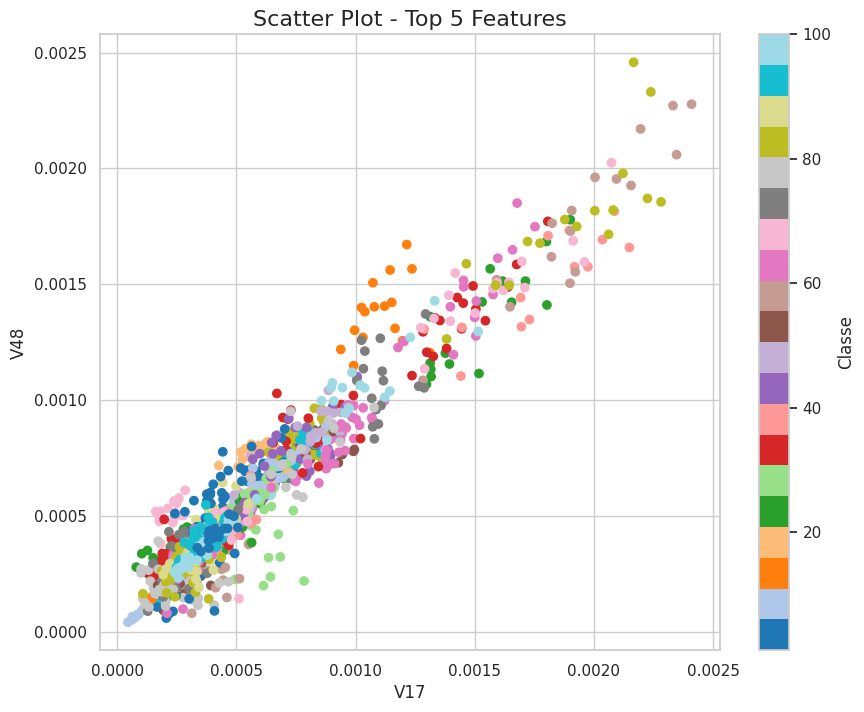

In [31]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(df[top_features.index[0]], df[top_features.index[1]], c=df['Class'], cmap='tab20', marker='o', label='Feature 1 vs Feature 2')

plt.title('Scatter Plot - Top 5 Features', fontsize=16)
plt.xlabel(f'{top_features.index[0]}', fontsize=12)
plt.ylabel(f'{top_features.index[1]}', fontsize=12)

plt.colorbar(scatter, label='Classe')

plt.show()

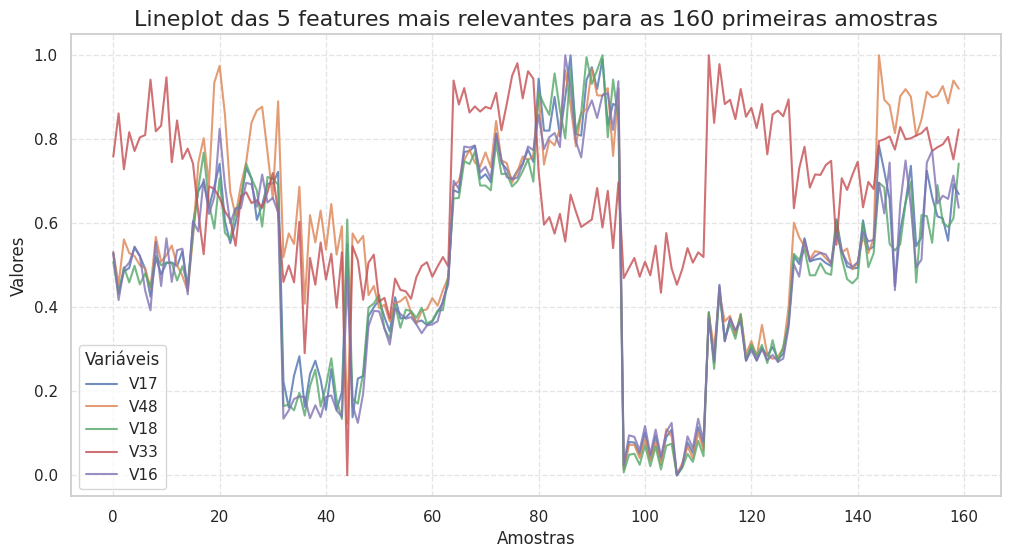

In [32]:
df_subset = df[top_features.index].iloc[:160]

scaler = MinMaxScaler()
df_subset_normalized = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)

plt.figure(figsize=(12, 6))

for feature in df_subset_normalized.columns:
    sns.lineplot(data=df_subset_normalized[feature], label=feature, linewidth=1.5, alpha=0.8)

plt.xlabel("Amostras", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.title("Lineplot das 5 features mais relevantes para as 160 primeiras amostras", fontsize=16)

plt.legend(title="Variáveis")

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [33]:
X = df.drop(['Class'], axis=1)
X = X.values
y = df['Class']
y = y.apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
y = y.values

In [34]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
modelos = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

In [37]:
parametros = {
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance']},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    'Random Forest': {'n_estimators': [10, 30, 50, 100], 'max_depth': [10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2]},
    'Logistic Regression': {'solver': ['liblinear'], 'C': [0.01, 0.1, 1], 'penalty': ['l2']}
}

In [38]:
resultados = {}
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

metricas_modelos = {}
for nome in modelos.keys():
    metricas_modelos[nome] = {'acuracia': [], 'precisao': [], 'recall': [], 'f1_score': []}

for nome, modelo in modelos.items():
    grid = GridSearchCV(modelo, parametros[nome], cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)

    melhores_parametros = grid.best_params_
    melhor_modelo = grid.best_estimator_

    y_pred = melhor_modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=1)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='macro')

    resultados[nome] = {
        'melhor_modelo': melhor_modelo,
        'melhores_parametros': melhores_parametros,
        'acuracia': acc,
        'precisao': prec,
        'recall': rec,
        'f1_score': f1
    }

    print(f"Modelo: {nome}")
    print(f"Melhores Parâmetros: {melhores_parametros}")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 30)

    fold_number = 1
    for train_index, val_index in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        melhor_modelo.fit(X_train_fold, y_train_fold)

        y_pred_fold = melhor_modelo.predict(X_val_fold)

        acc_fold = accuracy_score(y_val_fold, y_pred_fold)
        prec_fold = precision_score(y_val_fold, y_pred_fold, average='macro', zero_division=1)
        rec_fold = recall_score(y_val_fold, y_pred_fold, average='macro', zero_division=1)
        f1_fold = f1_score(y_val_fold, y_pred_fold, average='macro')

        metricas_modelos[nome]['acuracia'].append(acc_fold)
        metricas_modelos[nome]['precisao'].append(prec_fold)
        metricas_modelos[nome]['recall'].append(rec_fold)
        metricas_modelos[nome]['f1_score'].append(f1_fold)

        print(f"\n--- Fold {fold_number} ---")
        print(f"Acurácia: {acc_fold:.4f}")
        print(f"Precisão: {prec_fold:.4f}")
        print(f"Recall: {rec_fold:.4f}")
        print(f"F1-Score: {f1_fold:.4f}")
        fold_number += 1

    print("=" * 60)

Modelo: KNN
Melhores Parâmetros: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Acurácia: 0.5844
Precisão: 0.6212
Recall: 0.6078
F1-Score: 0.5310
------------------------------

--- Fold 1 ---
Acurácia: 0.6562
Precisão: 0.7244
Recall: 0.6676
F1-Score: 0.5289

--- Fold 2 ---
Acurácia: 0.6250
Precisão: 0.6790
Recall: 0.6240
F1-Score: 0.4899

--- Fold 3 ---
Acurácia: 0.5234
Precisão: 0.6235
Recall: 0.6249
F1-Score: 0.4384

--- Fold 4 ---
Acurácia: 0.6250
Precisão: 0.6870
Recall: 0.6725
F1-Score: 0.5688

--- Fold 5 ---
Acurácia: 0.6641
Precisão: 0.7470
Recall: 0.7203
F1-Score: 0.5856

--- Fold 6 ---
Acurácia: 0.6406
Precisão: 0.6954
Recall: 0.6649
F1-Score: 0.5346

--- Fold 7 ---
Acurácia: 0.5469
Precisão: 0.6579
Recall: 0.5965
F1-Score: 0.4643

--- Fold 8 ---
Acurácia: 0.6562
Precisão: 0.7341
Recall: 0.6674
F1-Score: 0.5173

--- Fold 9 ---
Acurácia: 0.5547
Precisão: 0.6643
Recall: 0.6155
F1-Score: 0.4725

--- Fold 10 ---
Acurácia: 0.6250
Precisão: 0.7280
Recall: 0.672

In [39]:
print("\n===== MÉTRICAS MÉDIAS POR MODELO =====")
for nome, metricas in metricas_modelos.items():
    acuracia_media = sum(metricas['acuracia']) / len(metricas['acuracia'])
    precisao_media = sum(metricas['precisao']) / len(metricas['precisao'])
    recall_media = sum(metricas['recall']) / len(metricas['recall'])
    f1_score_media = sum(metricas['f1_score']) / len(metricas['f1_score'])

    print(f"{nome} - Acurácia Média: {acuracia_media:.4f}")
    print(f"{nome} - Precisão Média: {precisao_media:.4f}")
    print(f"{nome} - Recall Médio: {recall_media:.4f}")
    print(f"{nome} - F1-Score Médio: {f1_score_media:.4f}")
    print("=" * 30)

    resultados[nome]['acuracia_media'] = acuracia_media
    resultados[nome]['precisao_media'] = precisao_media
    resultados[nome]['recall_media'] = recall_media
    resultados[nome]['f1_score_media'] = f1_score_media


===== MÉTRICAS MÉDIAS POR MODELO =====
KNN - Acurácia Média: 0.6117
KNN - Precisão Média: 0.6941
KNN - Recall Médio: 0.6526
KNN - F1-Score Médio: 0.5113
SVM - Acurácia Média: 0.6617
SVM - Precisão Média: 0.7188
SVM - Recall Médio: 0.7013
SVM - F1-Score Médio: 0.5697
Random Forest - Acurácia Média: 0.5547
Random Forest - Precisão Média: 0.6810
Random Forest - Recall Médio: 0.6292
Random Forest - F1-Score Médio: 0.4626
Logistic Regression - Acurácia Média: 0.0031
Logistic Regression - Precisão Média: 0.9764
Logistic Regression - Recall Médio: 0.0211
Logistic Regression - F1-Score Médio: 0.0003


In [40]:
wilcoxon_results = {}

metricas = ['acuracia', 'precisao', 'recall', 'f1_score']

for metrica in metricas:
    wilcoxon_results[metrica] = []
    print(f"Teste de Wilcoxon para {metrica.capitalize()}:\n")
    for nome_modelo_1, metrica_1 in metricas_modelos.items():
        for nome_modelo_2, metrica_2 in metricas_modelos.items():
            if nome_modelo_1 != nome_modelo_2:

                stat, p_value = wilcoxon(metrica_1[metrica], metrica_2[metrica])

                if p_value < 0.05:
                    resultado = f"{nome_modelo_1} vs {nome_modelo_2} - Estatística: {stat:.4f}, p-valor: {p_value:.4f}\nDiferença estatisticamente significativa (p < 0.05)"
                else:
                    resultado = f"{nome_modelo_1} vs {nome_modelo_2} - Estatística: {stat:.4f}, p-valor: {p_value:.4f}\nSem diferença estatisticamente significativa (p >= 0.05)"

                wilcoxon_results[metrica].append(resultado)

                print(resultado)

    print("\n" + "="*50 + "\n")

for metrica, resultados in wilcoxon_results.items():
    print(f"--- {metrica.capitalize()} ---")
    for resultado in resultados:
        print(resultado)
    print("\n" + "="*50 + "\n")

Teste de Wilcoxon para Acuracia:

KNN vs SVM - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
KNN vs Random Forest - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
KNN vs Logistic Regression - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
SVM vs KNN - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
SVM vs Random Forest - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
SVM vs Logistic Regression - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
Random Forest vs KNN - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
Random Forest vs SVM - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
Random Forest vs Logistic Regression - Estatística: 0.0000, p-valor: 0.0020
Di